# Determine normality and apply transformations to make data normally distributed 📈

As you go along you'll get to know how to determine🔎 normality statistically and visually, apply transformations to make data more normally distributed📈 for regression, and also apply inverse transformations🙃 to be able to use these in a regression context.

I'll be making our target variable normally distributed, **you can transform the independent variables too**.

The first thing we need to do is to import some relevant libraries.

## Import Libraries 📦

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import Dataset 📄

We'll be using the `Ames_Housing_Sales_RO.csv` Dataset this time, which we've exported in the previous notebook. Here we removed all the outlier present in features columns.

The Ames housing dataset examines features of houses sold in Ames during the 2006–10 timeframe. The goal is to use the training data to predict the sale prices of the houses in the testing data.

In [602]:
data = pd.read_csv('../datasets/Ames_Housing_Sales_RO.csv')
data.head() #this returns top 5 rows of the dataset

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
2,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
3,1694.0,0.0,0.0,None,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
4,1040.0,0.0,0.0,None,3,1Fam,TA,No,906.0,0.0,...,0.0,Pave,5,1040.0,AllPub,0.0,1965,1965,2008,129500.0


In [603]:
# to get descriptive statistics of the dataset
data.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,546.000000,546.000000,546.0,546.000000,546.000000,546.0,546.00000,546.0,546.000000,546.0,...,546.000000,546.0,546.0,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,1124.684982,323.813187,0.0,2.815018,445.175824,0.0,0.42674,0.0,628.161172,0.0,...,6.316850,0.0,0.0,6.369963,1073.336996,96.276557,1984.490842,1989.756410,2007.769231,182709.472527
std,290.178243,424.187978,0.0,0.661270,412.578189,0.0,0.49875,0.0,431.967060,0.0,...,1.219253,0.0,0.0,1.325313,294.035921,101.891769,24.181669,19.281717,1.326458,54799.687932
min,438.000000,0.000000,0.0,1.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,2.000000,0.0,0.0,3.000000,290.000000,0.000000,1910.000000,1950.000000,2006.000000,60000.000000
25%,884.000000,0.000000,0.0,2.000000,0.000000,0.0,0.00000,0.0,280.250000,0.0,...,5.000000,0.0,0.0,6.000000,860.000000,0.000000,1967.000000,1974.250000,2007.000000,140000.000000
50%,1078.500000,0.000000,0.0,3.000000,442.000000,0.0,0.00000,0.0,521.500000,0.0,...,6.000000,0.0,0.0,6.000000,1029.000000,100.000000,1997.000000,1999.000000,2008.000000,178000.000000
75%,1326.250000,741.000000,0.0,3.000000,745.000000,0.0,1.00000,0.0,898.250000,0.0,...,7.000000,0.0,0.0,7.000000,1283.250000,168.000000,2004.000000,2005.000000,2009.000000,215000.000000
max,2117.000000,1349.000000,0.0,4.000000,1619.000000,0.0,2.00000,0.0,1670.000000,0.0,...,10.000000,0.0,0.0,10.000000,1980.000000,426.000000,2009.000000,2010.000000,2010.000000,342643.000000


👀 Look at the mean, and 50%, which is the median, for our target variable `SalePrice`

Median is smaller than Mean, so we can say our target variable is **right-skewed** or **positively skewed**, as for **right-skewed** or **positively skewed**, **Mode < Median < Mean**

Let's also determine normality using some of the approaches that we mentioned.

## Determine Normality 📊
Making target variables normally distributed leads to better results.

### Visually
Plot a histogram of the target variable

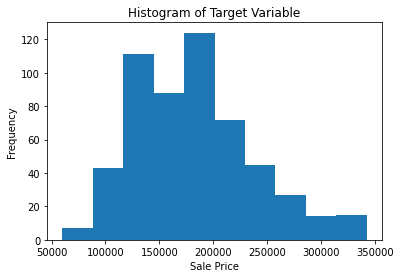

In [604]:
ax = plt.axes()
ax.hist(data.SalePrice);

ax.set(xlabel='Sale Price', 
       ylabel='Frequency',
       title='Histogram of Target Variable');

Does not look normal due to that right tail. Not that much but still.

Let's try to verify statistically:

### Using a statistical test

This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect but suffice it.

- This test outputs a "`p-value`". The higher this `p-value` is the closer the distribution is to normal.
- Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if `p > 0.05`.

Import the test (D'Agostino K^2 Test) from `scipy.stats.mstats`

In [605]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [606]:
# lets perform the test
normaltest(data.SalePrice.values)

NormaltestResult(statistic=31.789632638462976, pvalue=1.2501697370389989e-07)

The `p-value` is extremely low. The target variable is not normally distributed. And we've to try and get the target variable to be normally distributed, which we'll be doing now.

We'll try some common transformations and try to get the target variable to be normally distributed.

## Apply Transformations 🐛➡🦋
### Log Transformation
The log transform can transform data that is significantly skewed right to be more normally distributed:
##### Applying log transformation to target varible

<AxesSubplot:>

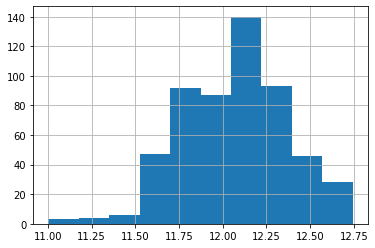

In [607]:
log_target = np.log(data["SalePrice"])
# plotting histogram
log_target.hist()

### Square Root Transformation
The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data.

##### Applying square root transformation to target variable

(array([  4.,   5.,  51., 105.,  76., 132.,  85.,  42.,  25.,  21.]),
 array([244.94897428, 278.98979244, 313.03061061, 347.07142877,
        381.11224694, 415.1530651 , 449.19388327, 483.23470144,
        517.2755196 , 551.31633777, 585.35715593]),
 <BarContainer object of 10 artists>)

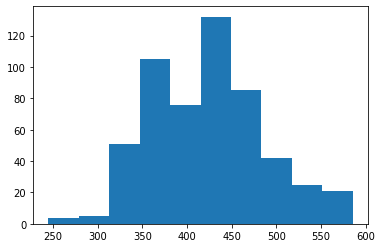

In [608]:
sqrt_target = np.sqrt(data["SalePrice"])
# plotting histogram
plt.hist(sqrt_target)

### Box-Cox Transformation
The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

 $\text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda}$ 

You can think of it as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

We have to import the `boxcox` from the `scipy.stats`.

In [609]:
from scipy.stats import boxcox

##### Applying boxcox transformation to target variable

In [610]:
boxcox_result = boxcox(data["SalePrice"])
boxcox_target = boxcox_result[0]
lam = boxcox_result[1]
lam

0.1766281136075183

(array([  4.,   3.,  15.,  62., 105., 105., 112.,  76.,  41.,  23.]),
 array([33.8655835 , 35.28997294, 36.71436239, 38.13875184, 39.56314128,
        40.98753073, 42.41192017, 43.83630962, 45.26069907, 46.68508851,
        48.10947796]),
 <BarContainer object of 10 artists>)

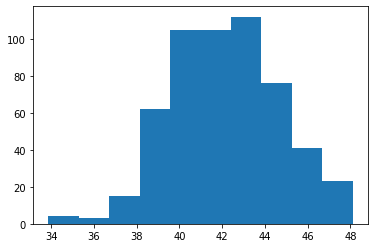

In [611]:
# plotting histogram
plt.hist(boxcox_target)

Boxcox function choose `0.1766281136075183` the optimal value of lambda for us and applied transformation.

### Compare `p-value`

In [612]:
print("Normal Test Results...")
print("Log Transformation : ", normaltest(log_target))
print("Square Root Transformation : ", normaltest(sqrt_target))
print("Box-Cox Transformation : ", normaltest(boxcox_target))

Normal Test Results...
Log Transformation :  NormaltestResult(statistic=2.200318270889921, pvalue=0.3328181163246658)
Square Root Transformation :  NormaltestResult(statistic=7.053551958548181, pvalue=0.02939954798915904)
Box-Cox Transformation :  NormaltestResult(statistic=0.4958243627659459, pvalue=0.780428476418235)


Now let's fit a basic linear regression model and compare results.

## Separate features and target 🖖

In [613]:
target_col = "SalePrice"

X = data.drop(target_col, axis=1)
y = data[target_col]

In [614]:
# dropping categorical variables
X = X.drop(X.columns[X.dtypes == np.object], axis=1)

## Create train and test splits ⚔️

In [615]:
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # splits train and test in 7:3 ratio

## Fit Linear Regression and calculate the R2 Score 💪

In [616]:
# import linear regression and create an instance of it
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [617]:
# import r2 score
from sklearn.metrics import r2_score

In [618]:
# Storage for R2 Scores
r2_score_df = list()

In [619]:
# no transformation
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train) # using train data
y_test_pred = LR.predict(X_test) # using test data

r2_score_df.append(pd.Series({'train': r2_score(y_train.values, y_train_pred),
                           'test' : r2_score(y_test.values,  y_test_pred)},
                           name='no trans'))

In [620]:
## log transformation

# applying log transformation
log_train = np.log(y_train)
log_test = np.log(y_test)

# fitting regression
LR = LR.fit(X_train, log_train)
y_train_pred = LR.predict(X_train) # using train data
y_test_pred = LR.predict(X_test) # using test data

r2_score_df.append(pd.Series({'train': r2_score(log_train.values, y_train_pred),
                           'test' : r2_score(log_test.values,  y_test_pred)},
                           name='log trans'))

In [621]:
## square root transformation

# applying square root transformation
sqrt_train = np.sqrt(y_train)
sqrt_test = np.sqrt(y_test)

# fitting regression
LR = LR.fit(X_train, sqrt_train)
y_train_pred = LR.predict(X_train) # using train data
y_test_pred = LR.predict(X_test) # using test data

r2_score_df.append(pd.Series({'train': r2_score(sqrt_train.values, y_train_pred),
                           'test' : r2_score(sqrt_test.values,  y_test_pred)},
                           name='sqrt trans'))

We can also do the **inverse transformation** to get them back on the same scale as the original numbers

In [622]:
## box-cox transformation

# applying box-cox transform
boxcox_result = boxcox(y_train)
y_train_bc = boxcox_result[0]
lam = boxcox_result[1]

# Fitting regression
LR = LR.fit(X_train, y_train_bc)
# Predicting
y_train_pred = LR.predict(X_train) # using train data
y_test_pred = LR.predict(X_test) # using test data

As we transformed our outcome variable with Box-Cox Transformation the predicted outcome and the original outcome are not on the same scale. So, to realign and actually predict, we have to do the __inverse transformation__ to get them back on the same scale as the original numbers.

Every transformation has an __inverse transformation__. The __inverse transformation__ of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well. We have to pass in the lambda value that we found from before.

Import `inv_boxcox` from `scipy.special`

In [623]:
from scipy.special import inv_boxcox

In [624]:
# Apply inverse tranformation to y_train_pred (predicted outcome on train data)
y_train_pred_inv = inv_boxcox(y_train_pred, lam)
# Apply inverse tranformation to y_test_pred (predicted outcome on test data)
y_test_pred_inv = inv_boxcox(y_test_pred, lam)

r2_score_df.append(pd.Series({'train': r2_score(y_train.values, y_train_pred_inv),
                           'test' : r2_score(y_test.values,  y_test_pred_inv)},
                           name='boxcox trans'))

In [625]:
# Assemble the results
r2_score_df = pd.concat(r2_score_df, axis=1)
# R2 Scores, outcome variable not normally distributed
r2_score_df

,no trans,log trans,sqrt trans,boxcox trans
train,0.902088,0.918796,0.916772,0.915415
test,0.881495,0.890012,0.894425,0.904657
